In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df1=pd.read_csv("datasets_20710_26737_Bengaluru_House_Data.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

# Here "area_type" is a categorical data and also a import factor for target value... needs to analyse perfectly.

In [5]:
#observing the areas

df1.groupby(['location']).agg("count")

,area_type,availability,size,society,total_sqft,bath,balcony,price
location,,,,,,,,
Anekal,1,1,1,0,1,1,1,1
Banaswadi,1,1,1,1,1,1,1,1
Basavangudi,1,1,1,0,1,1,1,1
Bhoganhalli,1,1,1,1,1,1,1,1
Devarabeesana Halli,6,6,6,4,6,6,6,6
...,...,...,...,...,...,...,...,...
t.c palya,1,1,1,0,1,1,1,1
tc.palya,4,4,4,0,4,4,4,4
vinayakanagar,1,1,1,0,1,1,1,1


In [6]:
#groupby('based on which coloum') ['acoording which coloum']

df1.groupby("area_type")['area_type'].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
#removing nunecessary coloum

df2=df1.drop(['availability','society','balcony','area_type'],axis=1)

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2.shape

(13320, 5)

In [11]:
df3=df2.dropna()
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## "size" has string number value & bedroom and bhk are same

In [12]:
df3['size'].unique

<bound method Series.unique of 0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object>

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
# wrong method for condition with sorting....will show whol dataset

df3.where(df3['bhk']>16).sort_values(by='bhk',axis=0,ascending=True)

,location,size,total_sqft,bath,price,bhk
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18.0
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19.0
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27.0
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43.0
0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
13315,NaN,NaN,NaN,NaN,NaN,NaN
13316,NaN,NaN,NaN,NaN,NaN,NaN
13317,NaN,NaN,NaN,NaN,NaN,NaN
13318,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# right method with condition and sort

df3[df3['bhk']>16].sort_values(by='bhk',ascending=True)

,location,size,total_sqft,bath,price,bhk
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
# processing unorganized values( "-" between vlues )

df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
# finding where there is " - "
# this " - " is treated as float
#int/float data hole float e convert hbe..onno value hole hbe na


def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
        
        


In [22]:
# values which are not converted into float( having " - ")

df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [23]:
# value_counts() only works on a coloum,not on entire dataframe

df3['total_sqft'].apply(is_float).value_counts()


True     13056
False      190
Name: total_sqft, dtype: int64

In [24]:
# count() works on entire dataframe

df3[~df3['total_sqft'].apply(is_float)].count()

location      190
size          190
total_sqft    190
bath          190
price         190
bhk           190
dtype: int64

In [25]:
# converting " - " to number
# split on the basis of " . "

def dash_to_num(x):
    token=x.split('-') or x.split(' - ')   
    if len(token)==2 and token!=x.split('. '):
        return ((float(token[0])+float(token[1]))/2)
    
    try:
        return float(x)
    except:
        return None

In [26]:
print(dash_to_num('2100-2500'))
print(dash_to_num('2100 - 2500'))
print(dash_to_num('32. hbj'))


2300.0
2300.0
None


In [27]:

df4=df3.copy()

df4['total_sqft']=df3['total_sqft'].apply(dash_to_num)
df4.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [29]:
# all invalid data removeda

df4[~df4['total_sqft'].apply(is_float)].count()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [30]:
df4.price.unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [31]:
df4.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

## All the data cleaning have done successfully

# 

# Feature Engineering

In [32]:
# PRICE PER SQFT WILL HELP TO DETECT FURTHER ABNORMALITY 


df5=df4.copy()

df5['price_per_sqft']=df5['price']/df5['total_sqft']*100000

In [33]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
df5['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [35]:
df5['price_per_sqft'].max()

12000000.0

In [36]:
# here ismany ghapla in sqft..... we will solve them later

df5[df5['price_per_sqft']>50000]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
349,Suragajakkanahalli,3 Bedroom,11.0,3.0,74.0,3,6.727273e+05
1020,Weavers Colony,1 BHK,15.0,1.0,30.0,1,2.000000e+05
1122,Grihalakshmi Layout,5 Bedroom,24.0,2.0,150.0,5,6.250000e+05
4086,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,1.200000e+07
4972,Srirampuram,7 BHK,5.0,7.0,115.0,7,2.300000e+06
5970,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,5.111111e+04
6421,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,7.653061e+04
7088,Srirampuram,1 BHK,650.0,1.0,500.0,1,7.692308e+04
7657,Raghuvanahalli,1 BHK,425.0,1.0,750.0,1,1.764706e+05
7883,Vasanth nagar,4 BHK,2000.0,3.0,1063.0,4,5.315000e+04


In [37]:
df5[df5['price_per_sqft']>50000].describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,1505.066667,4.000000,942.866667,3.866667,1.120897e+06
std,2093.014110,3.273268,1102.499101,2.445599,3.065003e+06
min,1.000000,1.000000,23.000000,1.000000,5.034965e+04
25%,19.500000,1.500000,117.500000,2.000000,5.457500e+04
50%,425.000000,3.000000,500.000000,4.000000,7.692308e+04
75%,2450.000000,4.500000,1325.000000,4.500000,4.941667e+05
max,7150.000000,13.000000,3600.000000,10.000000,1.200000e+07


## solving categorical data



In [38]:
# total number of unique vales

df5['location'].nunique()

1304

## finding values of location which is very less 

In [39]:
# using groupby get the values

location_stat=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [40]:
location_stat

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [41]:
# getting the value of less then 10

location_stat[location_stat<=10].count()

1063

In [42]:
less_then_10=location_stat[location_stat<=10]

In [43]:
df5['location'].nunique()

1304

##  Removing system of unnecessary data =>

In [44]:
df5['location']=df5['location'].apply(lambda x: 'other' if x in less_then_10 else x)

In [45]:
df5.location.nunique()

242

#  Outlier removal

##  Removing data which are not realistic

In [46]:
df5.shape

(13246, 7)

In [47]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [48]:
# removing data where per bedroom is less then 300 sqft
# downlines there is problem and confusion

In [49]:
df6=df5[(df5.total_sqft/df5.bhk>300)]

In [50]:
df6.shape

(12274, 7)

In [51]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [52]:
df6.shape

(12502, 7)

In [53]:
(df5.total_sqft/df5.bhk>300).value_counts()

True     12274
False      972
dtype: int64

In [54]:
(df5.total_sqft/df5.bhk<=300).value_counts()

False    12320
True       926
dtype: int64


### in the upper lines there is prblem..could not solve the reason

In [55]:
# jai hok, as per tutorial

df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [56]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [57]:
df6.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12502.000000,12502.000000,12502.000000,12456.000000
mean,1590.189927,2.564790,111.311915,2.650696,6308.502826
std,1260.404795,1.084946,152.089966,0.981698,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


## remove very high & very low price_per_sqft

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E581893148>,
      dtype=object)

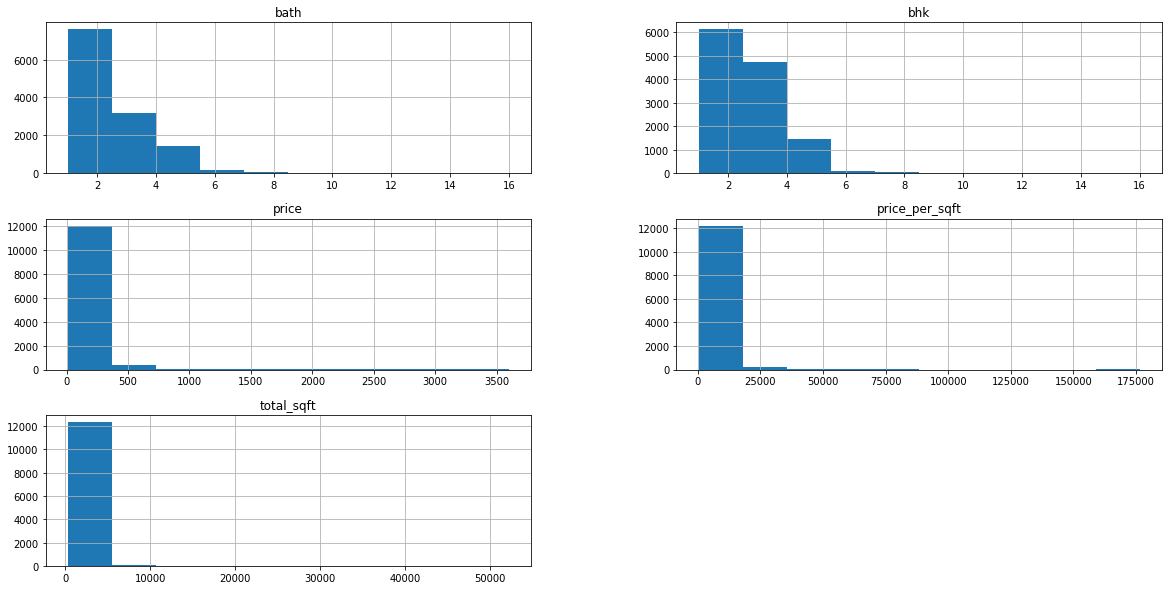

In [58]:
df6.hist(figsize=(20,10))

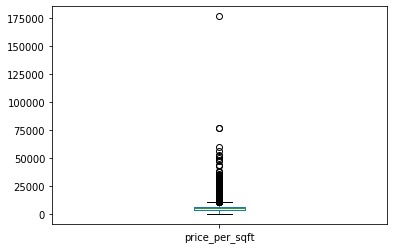

In [59]:
df6['price_per_sqft'].plot.box()

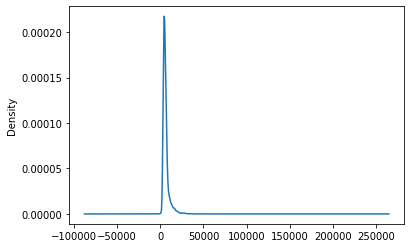

In [60]:
df6['price_per_sqft'].plot.density()

## function of removing outlier

In [61]:
#bujhi nai valo moto

def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
        
    return df_out 

In [62]:
df7=remove_pps_outlier(df6)
df7.shape

(10244, 7)

In [63]:
def plot_satter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total sqft area")
    plt.ylabel("Price per sqft")
    plt.title(location)
    plt.legend()


    

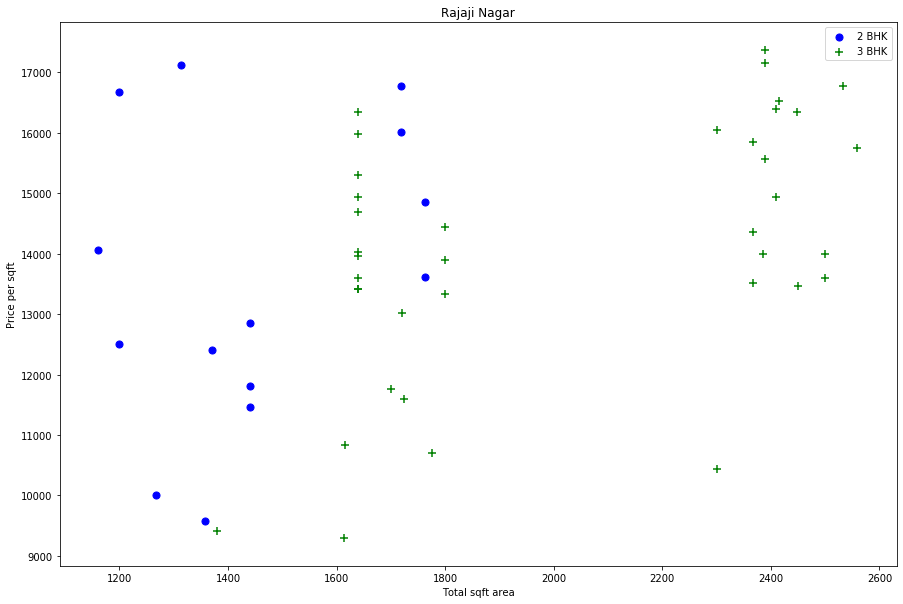

In [64]:
# it is quite ok

plot_satter_chart(df7,"Rajaji Nagar")

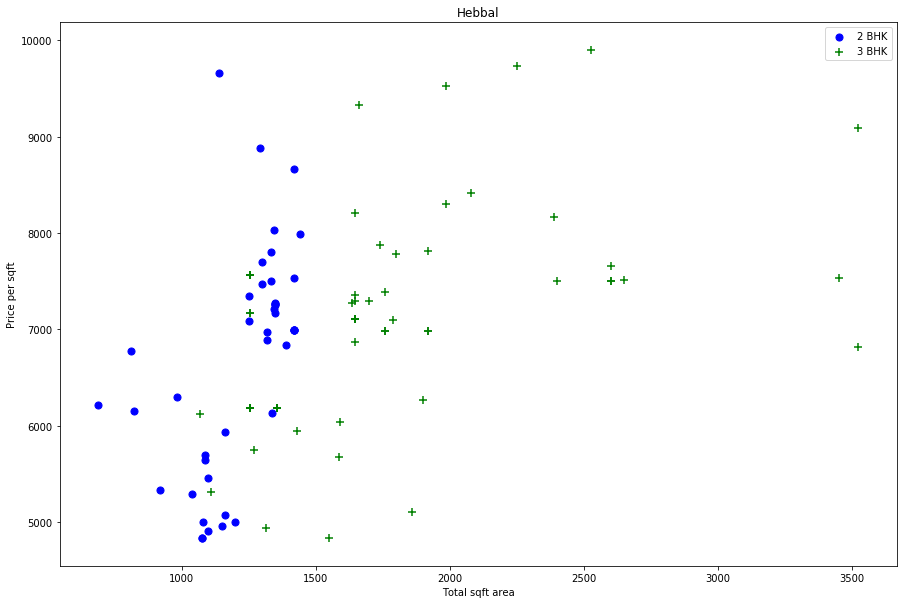

In [65]:
# but this is not well organized
# here in the same location,1 bhk price is greater then 2 bhk in some cases
# need to remove them


plot_satter_chart(df7,"Hebbal")